# Everything Counts Assignment 1
Author: Fraser Deans

The Github repository is available at:
https://github.com/fraserdeans/lis-everything-counts-1


## The data

The experiment aimed to test the impact of nature-focused activities on people's connectedness to nature and their wellbeing.
The data were collected through experimentation, not observation.

The researchers recruited 1295 people through social media and print media. 

Study participants completed a pre-participation survey. 

Participants were assigned to one of six groups. Each group were asked to take part in a nature-focused activity five times in a period of eight days. The activities included: 

1) Complete a timed pollinator count.
2) Complete a 10 minute butterfly survey.
3) Notice three good things in nature for 10 minutes.
4) Same as group 1 and also notice three good things in nature.
5) Same as group 2 and also notice three good things in nature. 
6) A control group who were told to wait until they were contacted again.

After the eight days, study participants completed a post-participation survey.

500 participants completed the full requirements of the study. 

The dataset includes:

1) The pre-participation data of 1295 people.
2) The post-participation survey data for the 500 people that completed the survey and either took part in their assigned activies at least once or were in the wait-list control group.

### Data source
Pocock, M.J.O.; Hamlin, I.; Christelow, J.; Passmore, H.-A.; Richardson, M. (2022). Survey data on wellbeing and nature connectedness before and after taking part in nature-based activities in 2020, UK NERC EDS Environmental Information Data Centre. https://doi.org/10.5285/56d4b055-c66b-42b9-8962-a47dfcf3b8b0

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/natureupclose_data.csv", encoding='ISO-8859-1')
# df.shape
# df.describe()

print(f'The data contains {df.shape[0]} observations and {df.shape[1]} variables.')

The data contains 1295 observations and 65 variables.


### The variables

A list of the variables in the dataset is included below.

In [2]:
df.columns

Index(['PersonID', 'LineSurvey1', 'ResponseIDSurvey1', 'DateSurvey1',
       'LineSurvey2', 'ResponseIDSurvey2', 'DateSurvey2', 'Participant',
       'INS_pre', 'INS_post', 'NR6sum_pre', 'NR6sum_post',
       'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre',
       'WorthwhileLife_post', 'PROCOBScivilaction_pre', 'PROCOBSgarden_pre',
       'PROCOBS_pre', 'PROCOBScivilaction_post', 'PROCOBSgarden_post',
       'PROCOBS_post', 'Health_pre', 'Health_post', 'Happiness_pre',
       'Happiness_post', 'Age', 'Age_comments', 'Sex', 'Ethnicgroup',
       'spendtimeoutsideatleastafewtimesperweek', 'postcode', 'condition',
       'conditiontext', 'conditiontypetext', 'Engagementwiththetask',
       'Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating', 'Timespentoutsideduringthetask',
       'H

The full list of variables and their meaning in the dataset.

| Variable                                      | Description                                                                              | Type                     |
|-----------------------------------------------|------------------------------------------------------------------------------------------|--------------------------|
| PersonID                                      | Unique identifier for each project participant.                                          | Categorical Nominal      |
| LineSurvey1                                   | Reference ID for pre-participation survey respondent.                                    | Categorical Nominal      |
| ResponseIDSurvey1                             | Unique ID for each pre-participation survey respondent.                                  | Categorical Nominal      |
| DateSurvey1                                   | Date and time respondent completed pre-participation survey.                             | Categorical Ordinal      |
| LineSurvey2                                   | Reference ID for post-participation survey respondent.                                   | Categorical Nominal      |
| ResponseIDSurvey2                             | Unique ID for each post-participation survey respondent.                                 | Categorical Nominal      |
| DateSurvey2                                   | Date and time respondent completed post-participation survey.                            | Categorical Ordinal      |
| Participant                                   | Indicates full participation status, 0 = not met, 1 = met.                               | Categorical Nominal      |
| INS_pre                                       | Pre-survey score of inclusion of nature in self scale (1 to 7).                          | Categorical Ordinal      |
| INS_post                                      | Post-survey score of inclusion of nature in self scale (1 to 7).                         | Categorical Ordinal      |
| NR6sum_pre                                    | Sum of six components of Nature Relatedness scale, pre-survey.                           | Numerical Discrete       |
| NR6sum_post                                   | Sum of six components of Nature Relatedness scale, post-survey.                          | Numerical Discrete       |
| SatisfiedWithLife_pre                         | Pre-survey life satisfaction score (0 to 10).                                            | Categorical Ordinal      |
| SatisfiedWithLife_post                        | Post-survey life satisfaction score (0 to 10).                                           | Categorical Ordinal      |
| WorthwhileLife_pre                            | Pre-survey life worthwhile score (0 to 10).                                              | Categorical Ordinal      |
| WorthwhileLife_post                           | Post-survey life worthwhile score (0 to 10).                                             | Categorical Ordinal      |
| PROCOBScivilaction_pre                        | Pre-survey score of civil action conservation behaviors.                                 | Numerical Discrete       |
| PROCOBSgarden_pre                             | Pre-survey score of garden conservation behaviors.                                       | Numerical Discrete       |
| PROCOBS_pre                                   | Pre-survey score of overall conservation behaviors.                                      | Numerical Discrete       |
| PROCOBScivilaction_post                       | Post-survey score of civil action conservation behaviors.                                | Numerical Discrete       |
| PROCOBSgarden_post                            | Post-survey score of garden conservation behaviors.                                      | Numerical Discrete       |
| PROCOBS_post                                  | Post-survey score of overall conservation behaviors.                                     | Numerical Discrete       |
| Health_pre                                    | Pre-survey self-rated health score (1 to 5).                                             | Categorical Ordinal      |
| Health_post                                   | Post-survey self-rated health score (1 to 5).                                            | Categorical Ordinal      |
| Happiness_pre                                 | Pre-survey happiness score (0 to 10).                                                    | Categorical Ordinal      |
| Happiness_post                                | Post-survey happiness score (0 to 10).                                                   | Categorical Ordinal      |
| Age                                           | Age of respondent in years.                                                              | Numerical Discrete       |
| Age_comments                                  | Comments provided about age.                                                             | Categorical Nominal      |
| Sex                                           | Sex selected by respondent.                                                              | Categorical Nominal      |
| Ethnicgroup                                   | Ethnic group selected by respondent.                                                     | Categorical Nominal      |
| spendtimeoutsideatleastafewtimesperweek       | Frequency of time spent outside in a typical week.                                       | Categorical Nominal      |
| postcode                                      | Postcode district provided by respondent.                                                | Categorical Nominal      |
| condition                                     | Assigned group for the study.                                                            | Categorical Nominal      |
| conditiontext                                 | Description of the assigned group.                                                       | Categorical Nominal      |
| conditiontypetext                             | Recoded grouping of study condition.                                                     | Categorical Nominal      |
| Engagementwiththetask                         | Level of engagement with the task.                                                       | Categorical Ordinal      |
| Ifeltclosetonaturethroughmysenses             | Agreement with feeling close to nature through senses.                                   | Categorical Ordinal      |
| Ifoundtakingpartcalmingorjoyful               | Agreement with finding the activity calming or joyful.                                   | Categorical Ordinal      |
| Inoticedthebeautyofnaturewhilsttakingpart     | Agreement with noticing nature's beauty.                                                 | Categorical Ordinal      |
| Ifoundtakingpartmeaningful                    | Agreement with finding the activity meaningful.                                          | Categorical Ordinal      |
| Ifeltiwashelpingtotakecareofnature            | Agreement with helping care for nature.                                                  | Categorical Ordinal      |
| Ifoundtakingpartfrustrating                   | Agreement with finding the activity frustrating.                                         | Categorical Ordinal      |
| Timespentoutsideduringthetask                 | Amount of time spent outside during the task.                                            | Categorical Ordinal      |
| Howmanytimesdidyoudotheactivities             | Number of times the activities were completed.                                           | Numerical Discrete       |
| Openquestionanswers                           | Indicates whether open question responses were given.                                    | Categorical Nominal      |
| Whatyoulikedabouttakingpart                   | Response describing what was liked about participation.                                  | Categorical Nominal      |
| liketheme_noticingnature                      | Responses mentioning appreciation for nature.                                            | Categorical Nominal      |
| liketheme_intrinsicbenefits                   | Responses mentioning intrinsic benefits of participation.                                | Categorical Nominal      |
| liketheme_contributing                        | Responses mentioning contribution to a cause.                                            | Categorical Nominal      |
| liketheme_learning                            | Responses mentioning learning as a benefit.                                              | Categorical Nominal      |
| liketheme_socialconnections                   | Responses mentioning social connections.                                                 | Categorical Nominal      |
| liketheme_other                               | Responses about other liked aspects of participation.                                    | Categorical Nominal      |
| Whatyoudidntlikeabouttakingpart               | Response describing dislikes about participation.                                        | Categorical Nominal      |
| disliketheme_weather                          | Responses mentioning weather as a barrier.                                               | Categorical Nominal      |
| disliketheme_lackoftime                       | Responses mentioning lack of time as a barrier.                                          | Categorical Nominal      |
| disliketheme_complexity                       | Responses mentioning complexity as a barrier.                                            | Categorical Nominal      |
| disliketheme_technology                       | Responses mentioning technological issues.                                               | Categorical Nominal      |
| disliketheme_lackofsuccess                    | Responses mentioning lack of success in the task.                                        | Categorical Nominal      |
| disliketheme_interferedwithnatureengagement   | Responses mentioning interference with nature enjoyment.                                 | Categorical Nominal      |
| disliketheme_nothing                          | Responses mentioning no dislikes about participation.                                    | Categorical Nominal      |
| disliketheme_other                            | Responses mentioning other dislikes about participation.                                 | Categorical Nominal      |
| Median_IMD_postcodedistrict                   | Median index of multiple deprivation decile score for postcode district.                                           | Numerical Discrete       |
| Mean_IMD_postcodedistrict                     | Mean index of multiple deprivation decile score for postcode district.                                             | Numerical Continuous     |
| latitude                                      | Latitude of the middle of the postcode district.                                         | Numerical Continuous     |
| longitude                                     | Longitude of the middle of the postcode district.                                        | Numerical Continuous     |


## Introduction

This experiment aimed to test the impact of nature-focused activites on nature-connectedness and wellbeing. 

This paper will analyse the relationships in the dataset between:

1) Nature intervention and impact on wellbeing.
2) Nature intervention and impact on inclusion of self in nature.
2) Time spent outside during the task and impact on wellbeing.
3) Age and engagement with the task.

## Cleaning the dataset 

### Removing variables

This dataset includes a comprehensive list of variables including responses to open-ended questions. As the analysis of these responses is outside of the focus of this paper they will be removed from the dataframe. 

In [3]:
df.drop(columns=['LineSurvey1', 'ResponseIDSurvey1', 'DateSurvey1',
       'LineSurvey2', 'ResponseIDSurvey2', 'DateSurvey2', 'NR6sum_pre', 'NR6sum_post', 'PROCOBScivilaction_pre', 'PROCOBSgarden_pre',
       'PROCOBS_pre', 'PROCOBScivilaction_post', 'PROCOBSgarden_post',
       'PROCOBS_post', 'Health_pre', 'Health_post', 'Age_comments', 'Sex', 'Ethnicgroup',
       'postcode', 'conditiontypetext',
       'Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating',
       'Howmanytimesdidyoudotheactivities', 'Openquestionanswers',
       'Whatyoulikedabouttakingpart', 'liketheme_noticingnature',
       'liketheme_intrinsicbenefits', 'liketheme_contributing',
       'liketheme_learning', 'liketheme_socialconnections', 'liketheme_other',
       'Whatyoudidntlikeabouttakingpart', 'disliketheme_weather',
       'disliketheme_lackoftime', 'disliketheme_complexity',
       'disliketheme_technology', 'disliketheme_lackofsuccess',
       'disliketheme_interferedwithnatureengagement', 'disliketheme_nothing',
       'disliketheme_other', 'Median_IMD_postcodedistrict',
       'Mean_IMD_postcodedistrict', 'latitude', 'longitude'], inplace=True)

df.columns

Index(['PersonID', 'Participant', 'INS_pre', 'INS_post',
       'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre',
       'WorthwhileLife_post', 'Happiness_pre', 'Happiness_post', 'Age',
       'spendtimeoutsideatleastafewtimesperweek', 'condition', 'conditiontext',
       'Engagementwiththetask', 'Timespentoutsideduringthetask'],
      dtype='object')

### Full inclusion requirements 

For participants to be included in the full study they must have:

1) Completed pre-participation survey.
2) Completed post-participation survey.
3) Took part in their assigned activity at least once OR were in the wait-list control group.

The variable `Participant` marks observations that meet the full criteria.

In [16]:
df['Participant'].value_counts()

Participant
0    795
1    500
Name: count, dtype: int64

500 participants meet the inclusion criteria.

This can be visualised as a share of the full dataset below.

<Axes: title={'center': 'Share of participants meet full inclusion requirements'}>

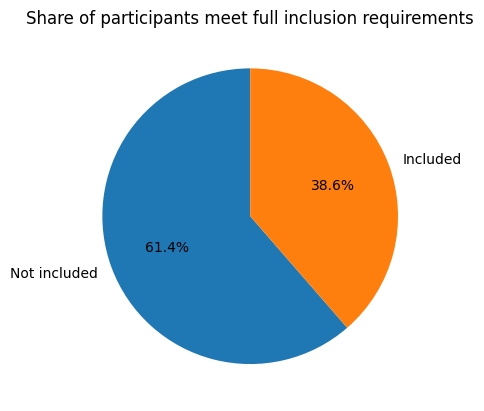

In [17]:
df['Participant'].value_counts().plot( kind='pie', startangle=90, autopct='%1.1f%%', labels=['Not included', 'Included'], ylabel="", title="Share of participants meet full inclusion requirements" )

Since the purpose of this analysis is to see the relationship between the intervention and wellbeing, observations that do not meet the full inclusion criteria will be removed.

In [22]:
df = df[ df['Participant'] == 1 ]

In [23]:
len(df)

500

## Analysis



### Nature intervention and impact on wellbeing

Show how many completed the requirements by task.

In [5]:
print( df["conditiontext"].value_counts() )
# .plot.bar()


conditiontext
combinedpollinator    217
combinedbutterfly     216
acontrol              216
noticingnature        216
butterfly             215
pollinator            215
Name: count, dtype: int64


In [6]:
print( df.groupby(['conditiontext', 'Participant']).size().unstack(fill_value=0) )

Participant           0    1
conditiontext               
acontrol             97  119
butterfly           121   94
combinedbutterfly   132   84
combinedpollinator  165   52
noticingnature      108  108
pollinator          172   43


<Axes: xlabel='conditiontext'>

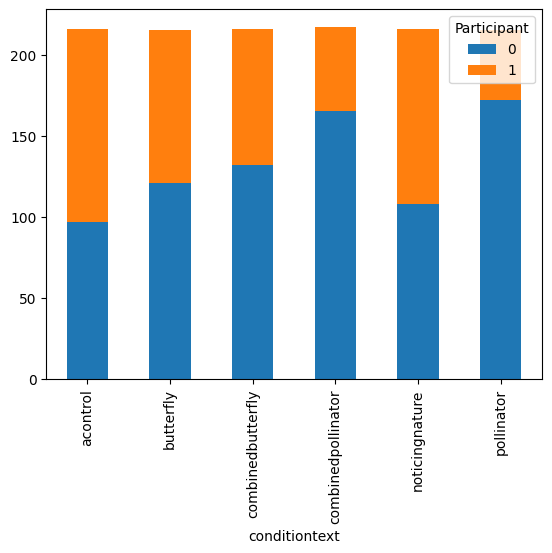

In [7]:
df_grouped_by_task_completion = df.groupby(['conditiontext', 'Participant']).size().unstack(fill_value=0)
df_grouped_by_task_completion.plot(kind="bar", stacked="True")

Filter to include only those that completed all the requirements.

<Axes: xlabel='conditiontext'>

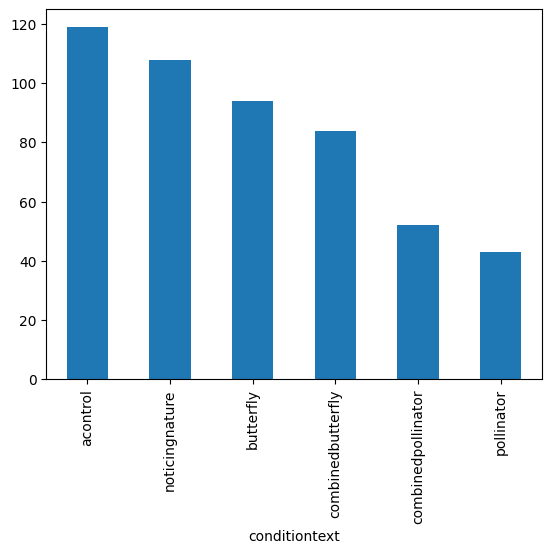

In [8]:
df_completed_reqs = df[df["Participant"] == 1]
df_completed_reqs["conditiontext"].value_counts().plot.bar()

In [9]:
df.head()

,PersonID,Participant,INS_pre,INS_post,SatisfiedWithLife_pre,SatisfiedWithLife_post,WorthwhileLife_pre,WorthwhileLife_post,Happiness_pre,Happiness_post,Age,spendtimeoutsideatleastafewtimesperweek,condition,conditiontext,Engagementwiththetask,Timespentoutsideduringthetask
0,77039.0,1,6.0,6.0,9.0,8.0,9.0,9.0,8.0,8.0,56.0,1,5,combinedbutterfly,3.0,3.0
1,17223.0,1,5.0,6.0,7.0,7.0,8.0,6.0,8.0,7.0,26.0,1,6,acontrol,NaN,NaN
2,23942.0,1,4.0,4.0,8.0,7.0,8.0,9.0,9.0,9.0,60.0,1,6,acontrol,0.0,0.0
3,86958.0,1,4.0,5.0,8.0,8.0,9.0,9.0,7.0,9.0,23.0,0,4,combinedpollinator,3.0,3.0
4,19857.0,1,6.0,6.0,6.0,7.0,6.0,7.0,7.0,7.0,57.0,1,5,combinedbutterfly,3.0,3.0


In [10]:
df.columns

Index(['PersonID', 'Participant', 'INS_pre', 'INS_post',
       'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre',
       'WorthwhileLife_post', 'Happiness_pre', 'Happiness_post', 'Age',
       'spendtimeoutsideatleastafewtimesperweek', 'condition', 'conditiontext',
       'Engagementwiththetask', 'Timespentoutsideduringthetask'],
      dtype='object')

<Axes: ylabel='Frequency'>

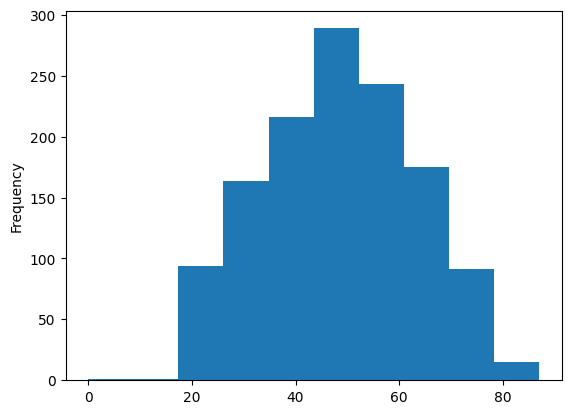

In [11]:
df['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

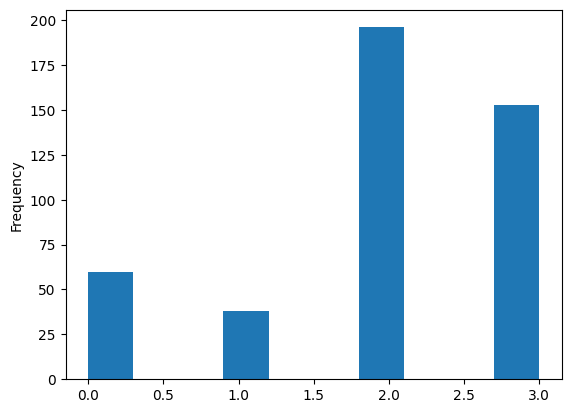

In [12]:
df['Engagementwiththetask'].plot(kind='hist')

<Axes: ylabel='Frequency'>

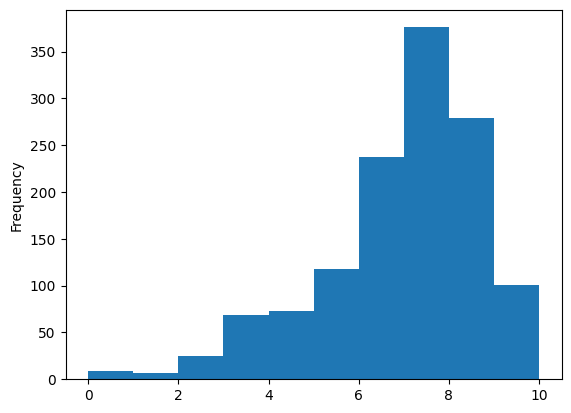

In [13]:
df['SatisfiedWithLife_pre'].plot(kind='hist')

<Axes: ylabel='Frequency'>

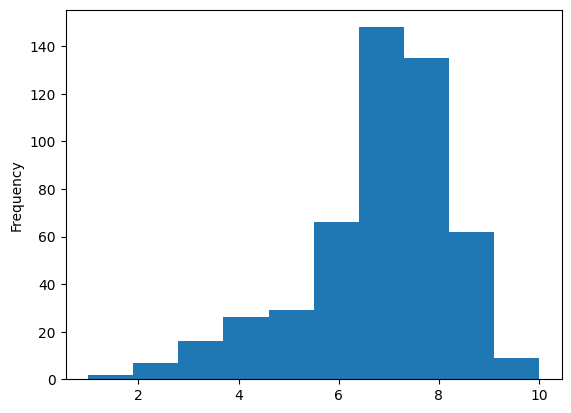

In [14]:
df['SatisfiedWithLife_post'].plot(kind='hist')

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Ifeltclosetonaturethroughmysenses'),
  Text(2, 0, 'Ifoundtakingpartcalmingorjoyful'),
  Text(3, 0, 'Inoticedthebeautyofnaturewhilsttakingpart'),
  Text(4, 0, 'Ifoundtakingpartmeaningful'),
  Text(5, 0, 'Ifeltiwashelpingtotakecareofnature'),
  Text(6, 0, 'Ifoundtakingpartfrustrating')])

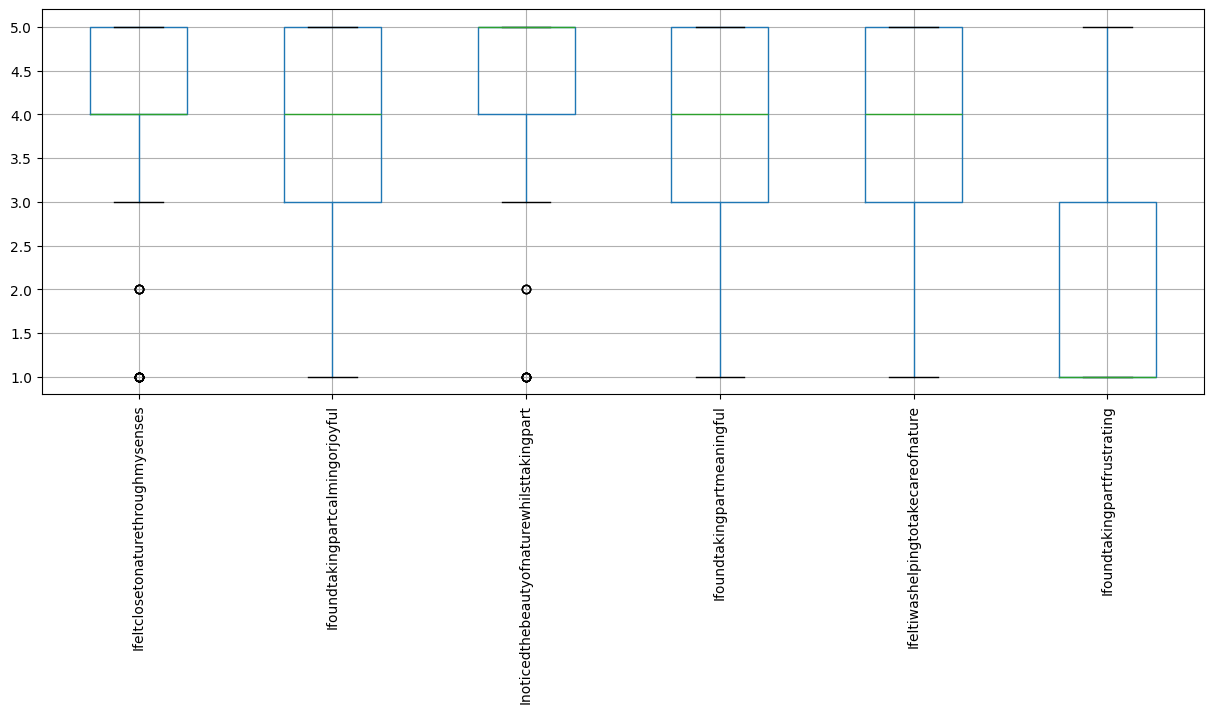

In [198]:
df.boxplot(column=['Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating'], figsize= (15,5))

plt.xticks(rotation='vertical')


<Axes: xlabel='Age', ylabel='Happiness_pre'>

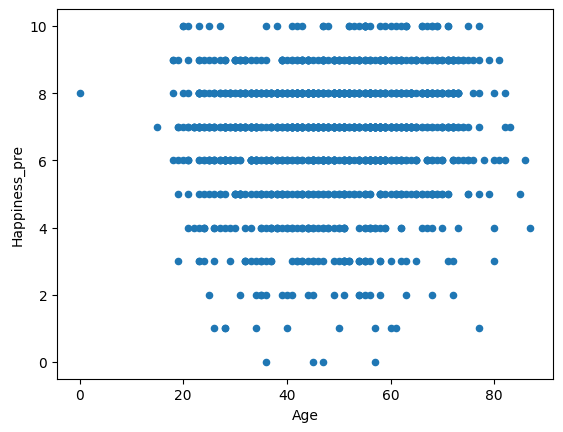

In [199]:
df.plot.scatter(x="Age", y="Happiness_pre")

<Axes: xlabel='Age', ylabel='Happiness_post'>

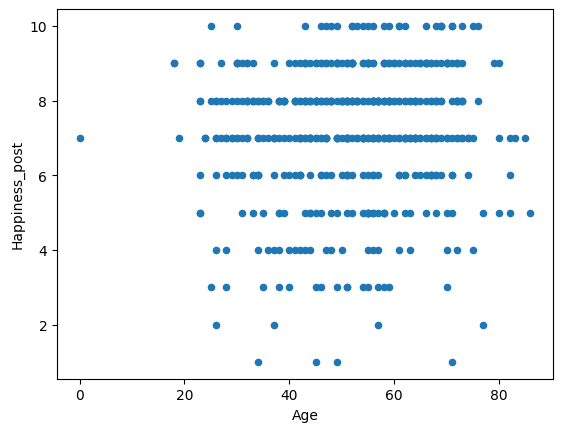

In [200]:
df.plot.scatter(x="Age", y="Happiness_post")

<Axes: xlabel='Age', ylabel='Happiness_diff'>

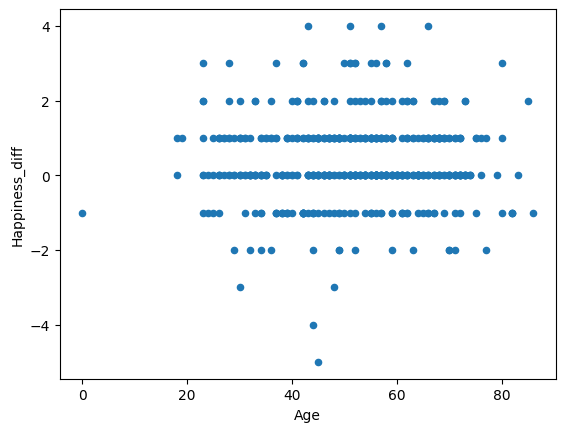

In [201]:
df['Happiness_diff'] = df["Happiness_post"] - df["Happiness_pre"]
df.plot.scatter(x="Age", y="Happiness_diff")

<Axes: xlabel='Age', ylabel='Happiness_diff'>

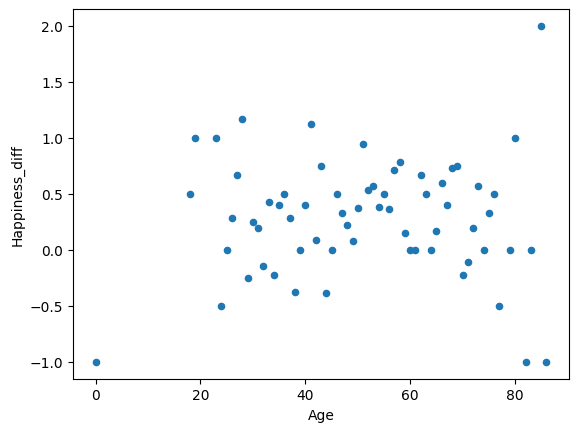

In [202]:
df_numeric = df.select_dtypes(include='number')
df_means = df_numeric.groupby(df['Age']).mean()

df_means.plot.scatter(x="Age", y="Happiness_diff")


In [203]:
import statsmodels.api as sm

formula_string = "Age ~ Engagementwiththetask"

model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.715
Date:                Thu, 31 Oct 2024   Prob (F-statistic):             0.0172
Time:                        18:16:24   Log-Likelihood:                -1812.1
No. Observations:                 445   AIC:                             3628.
Df Residuals:                     443   BIC:                             3636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.64

<Axes: xlabel='Age', ylabel='Engagementwiththetask'>

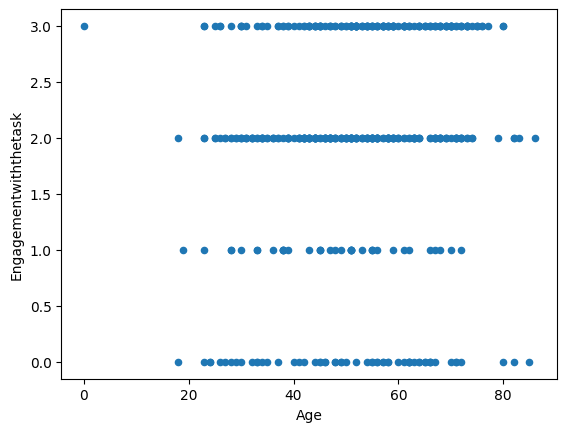

In [204]:
df.plot.scatter(x='Age', y='Engagementwiththetask')

<Axes: xlabel='Age', ylabel='Engagementwiththetask'>

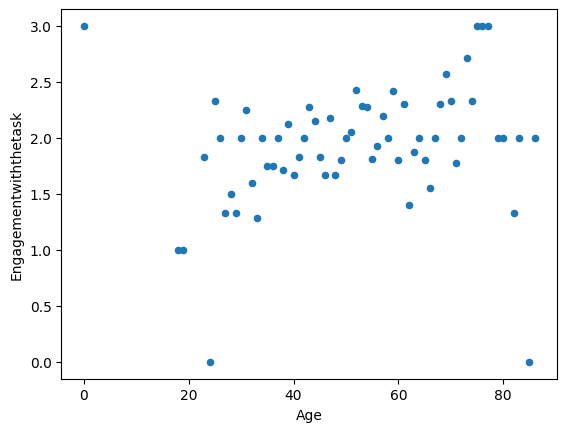

In [205]:
df_means.plot.scatter(x="Age", y="Engagementwiththetask")